## Problem 10: Banking predictions

Consider the Bank Marketing Dataset from UCI at

https://archive.ics.uci.edu/ml/datasets/bank+marketing

0) Go to above web site and read the description of the dataset. Download bank.csv.

1) Read in the CSV file using pandas. Pay attention to the file delimeter. Inspect the resulting dataframe with respect to the column names and the variable types.

2) Pick data from the following columns to a second dataframe 'df2': y, job, marital, default, housing, poutcome.

3) Convert categorical variables to dummy numerical values using the command
    ```
    df3 = pd.get_dummies(df2,columns=['job','marital','default','housing','poutcome'])

    ```
4) Produce a heat map of correlation coefficients for all variables in df3. Describe the amount of correlation between the variables in your own words.

5) Select the column called 'y' of df3 as the target variable y, and all the remaining columns for the explanatory variables X.

6) Split the dataset into training and testing sets with 75/25  ratio.

7) Setup a logistic regression model, train it with training data and predict on testing data.

8) Print the confusion matrix (or use heat map if you want) and accuracy score for the logistic regression model.

9) Repeat steps 7 and 8 for k-nearest neighbors model. Use k=3, for example, or experiment with different values.

10) Compare the results between the two models.

Type your findings in code commends or between triple quotes """...""".

Each step 1-10 above is worth a point. You need 6 points to complete this problem.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Step 1
path = os.path.join( os.getcwd(), "data/bank.csv")
df = pd.read_csv(path, header= 0, delimiter= ";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
# Step 2
x = "y, job, marital, default, housing, poutcome".split(', ')
df2 = df[x]
df2.head()

,y,job,marital,default,housing,poutcome
0,no,unemployed,married,no,no,unknown
1,no,services,married,no,yes,failure
2,no,management,single,no,yes,failure
3,no,management,married,no,yes,unknown
4,no,blue-collar,married,no,yes,unknown


In [4]:
# Step 3
df3 = pd.get_dummies(df2,columns=['job','marital','default','housing','poutcome'] , dtype = int)
df4 = df3.drop('y', axis=1)
df4.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,1,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,1,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1


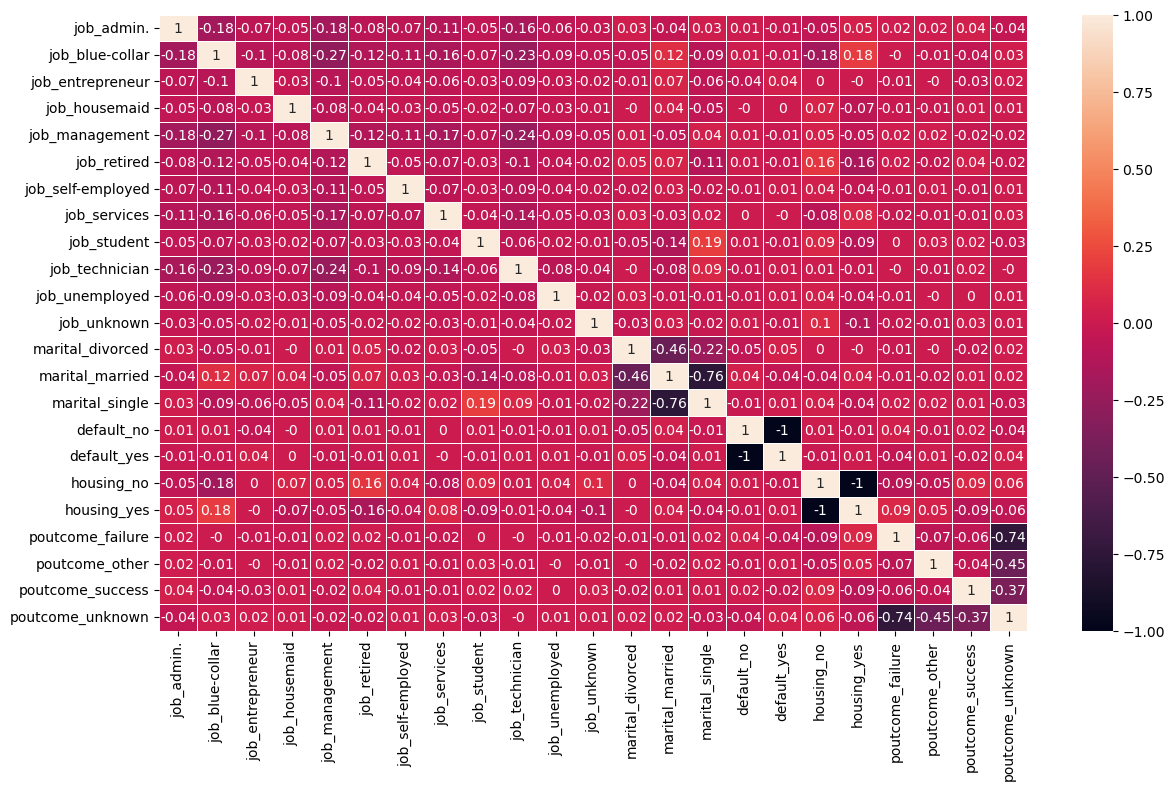

In [5]:
# Step 4
plt.figure(figsize=(14,8))
sns.heatmap(df4.corr().round(2), annot= True, linewidths=0.5)
plt.show()

- At a first glance, correlation is very low and almost non existent across majority of variables.
- Strong negative correlations exists between some mutually exclusive state of the same variable. (ie. obviously `marital_divorced` is negatively correlated to `marital_married`.)
- `p_outcome_success` have some low correlation with `y_yes` suggesting it would be a good predictor for `y_yes`


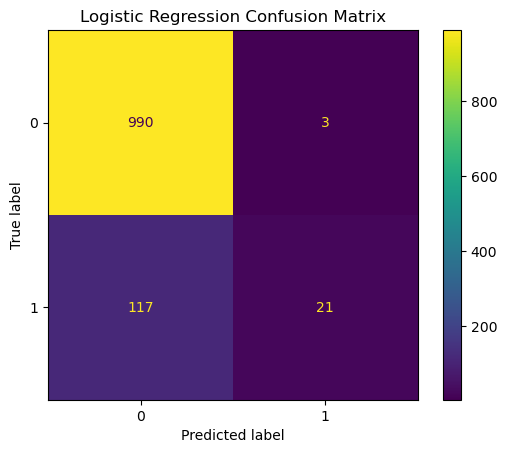

In [6]:
# Step 5
y = df3['y'].replace({'no':0, 'yes':1})
X = df4[:]

# Step 6
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

# Step 7
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Step 8
metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [7]:
print("Accuracy:  {}".format( metrics.accuracy_score(y_test, y_pred)))
print("Precision: {}".format(metrics.precision_score(y_test, y_pred)))
print("Recall:    {:.4f}".format( metrics.recall_score(y_test, y_pred)))

Accuracy:  0.8938992042440318
Precision: 0.875
Recall:    0.1522


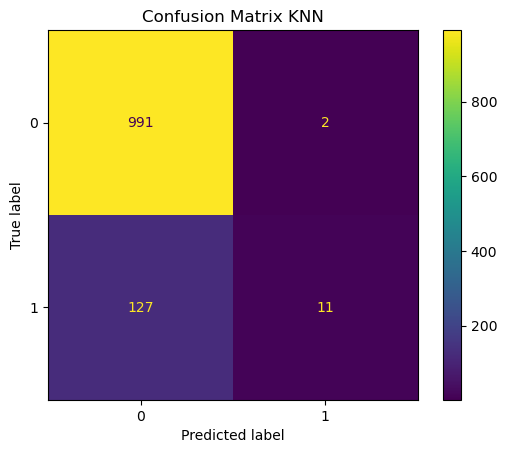

In [8]:
# Step 9
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

metrics.ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
plt.title("Confusion Matrix KNN")
plt.show()

In [9]:
print("Accuracy:  {}".format( metrics.accuracy_score(y_test, y_pred)))
print("Precision: {}".format(metrics.precision_score(y_test, y_pred)))
print("Recall:    {:.4f}".format( metrics.recall_score(y_test, y_pred)))

Accuracy:  0.8859416445623343
Precision: 0.8461538461538461
Recall:    0.0797


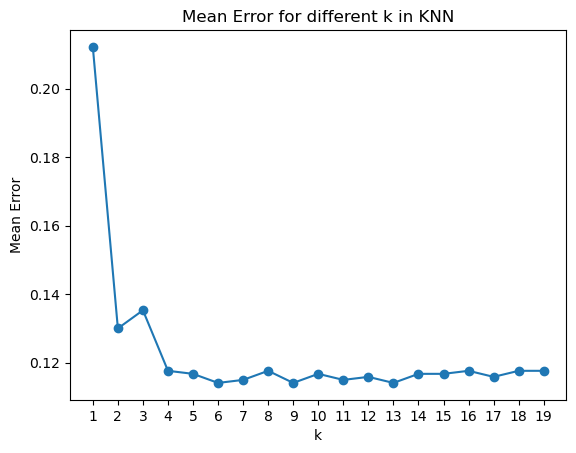

In [10]:
import matplotlib.ticker as mticker

error = []
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error.append(np.mean(y_pred != y_test))

plt.plot(range(1,20), error, marker = 'o')
plt.xlabel('k')
plt.ylabel('Mean Error')
plt.title("Mean Error for different k in KNN")
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))

plt.show()

In terms of accuracy and precision, logistic regression performed better in predicting `y` if the client has subscribed a term deposit. We can also see that logistic regression predicted more True positive compared to KNN. Recall is better but still pretty low for both models giving a lot of False negative.